# Wiki Networking

### Introduction

Network graphs consisting of nodes and edges and be used to visualize the relationships between people. The results can inform a viewer of groups of relationships. This abbreviated example demonstrates how to crawl Wiki articles and represent the links between these articles as a graph.

### `import` statements

First, we will import a few necessary packages, including `wikinetworking` from this repository. It includes functions for crawling and text mining Wiki data as well as graphing the result of the crawl.

In [1]:
import wikinetworking as wn
import networkx as nx
from pyquery import PyQuery
%matplotlib inline

print "OK"

### Crawling strategy

In this crawl, we will create a network of all characters in the Marvel Cinematic Universe. The general strategy is:
- Get all links from pages of Marvel characters by crawling each alphabetical page with a URL that begins with `https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_`
- Get all links from [`https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors`](https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors)
- The intersection of these links should be just pages pertaining to Marvel Cinematic Universe characters
- Crawl articles starting with [Iron Man](https://en.wikipedia.org/wiki/Iron_Man) 
- Convert the crawl data to an undirected graph, and save the graph in a json file

In [2]:
sections = [letter for letter in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ']
sections.append('0-9')
urls = ["https://en.wikipedia.org/wiki/List_of_Marvel_Comics_characters:_" + section for section in sections]

character_links = wn.retrieve_multipage(urls, ".hatnote", True)
wn.write_list(character_links, "marvel_character_links.txt")
print len(character_links), "links retrieved"

mcu_page = PyQuery(url="https://en.wikipedia.org/wiki/List_of_Marvel_Cinematic_Universe_film_actors")
mcu_links = wn.filter_links(mcu_page)
wn.write_list(mcu_links, "mcu_links.txt")

mcu_characters = wn.intersection(character_links, mcu_links)
wn.write_list(mcu_characters, "mcu_characters.txt")
print len(mcu_characters), "Marvel Cinematic Universe characters"

mcu_crawl_data = wn.crawl("/wiki/Iron_Man", accept=mcu_characters, reject=["/wiki/Marvel_Comics"])
mcu_undirected_graph = wn.undirected_graph(mcu_crawl_data)

wn.save_dict(mcu_undirected_graph, "mcu_network.json")
print load_dict("mcu_network.json")

{u'Iron Man': {u'url': u'/wiki/Iron_Man', u'edges': {u'Laufey (comics)': 2, u'Sharon Carter': 4, u'Helmut Zemo': 4, u'Iron Monger': 8, u'Ultron': 5, u'Tyr (Marvel Comics)': 2, u'Loki (comics)': 7, u'Maria Stark': 5, u'Friday (comics)': 6, u'Justin Hammer': 10, u'Ego the Living Planet': 3, u'Scarlet Witch': 2, u'War Machine': 16, u'Captain America': 18, u'Thor (Marvel Comics)': 14, u'Vision (Marvel Comics)': 3, u'Collector (comics)': 3, u'Volstagg': 2, u'Sif (comics)': 2, u'Grandmaster (Marvel Comics)': 3, u'Maria Hill': 8, u'Gabe Jones': 4, u'Alexander Goodwin Pierce': 2, u'Crossbones (comics)': 5, u'Phil Coulson': 3, u'Thanos': 6, u'Fandral': 2}}, u'Hank Pym': {u'url': u'/wiki/Hank_Pym', u'edges': {u'Hope Pym': 9, u'Iron Man': 7, u'Quicksilver (comics)': 3, u'Sharon Carter': 2, u'Darren Cross': 10, u'Helmut Zemo': 2, u'Red Skull': 3, u'Ultron': 17, u'Jasper Sitwell': 2, u'Loki (comics)': 3, u'Vulture (Marvel Comics)': 1, u'War Machine': 3, u'Gabe Jones': 2, u'Crossbones (comics)': 2, 

### Graphing the data

The data can be graphed as an interactive graph, which can in turn be saved as an HTML file.

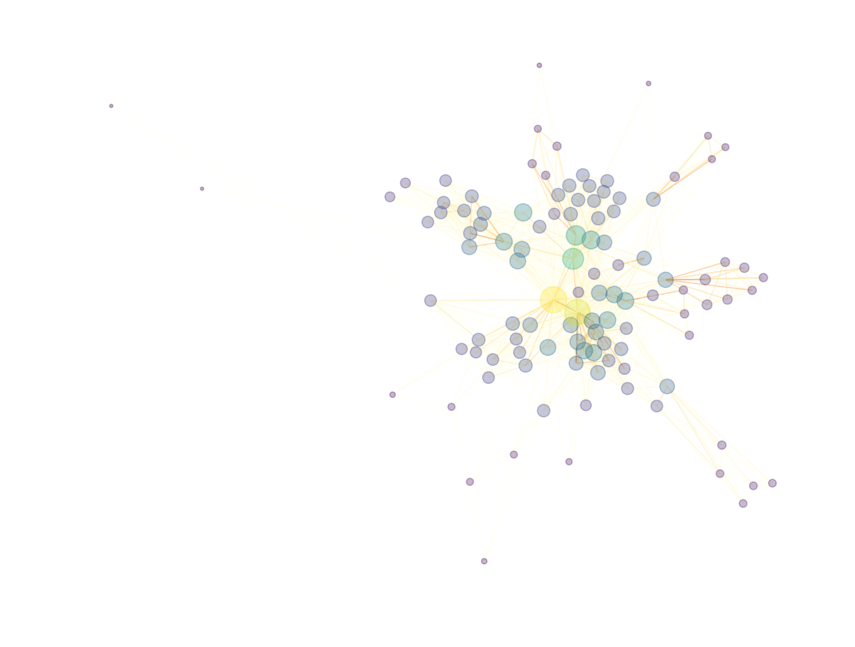

In [18]:
# Just in case you only want to run this cell and not re-run the crawl
import wikinetworking as wn
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

network = wn.load_dict("mcu_network.json")
graph = wn.create_graph(network, minimum_weight=2)
positions = nx.spring_layout(graph)
graph_html = wn.make_interactive_graph(graph, pos=positions, cmap=plt.cm.viridis, edge_cmap=plt.cm.YlOrBr)

with open("mcu_network.html", "w") as f:
    f.write(graph_html)
    f.close()